In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
from math import sqrt
import warnings
warnings.filterwarnings("ignore")

import env
import acquire
import split_scale
import features

#### Acquire and summarize data

In [2]:
#data for baseline model
df = acquire.wrangle_zillow()

In [3]:
#data for tax rate distribution
df_tax = acquire.zillow_tax()

In [4]:
df_tax.head(1)
df_tax['county']=df_tax['fips']
df_tax.county.min()

6037.0

In [5]:
#acquiring county names based on fips field
#from: https://www.nrcs.usda.gov/wps/portal/nrcs/detail/national/home/?cid=nrcs143_013697
df_tax['county'] = np.where(df_tax['fips']== 6037,'Los Angles',(np.where(df_tax['fips']== 6059,'Orange',(np.where(df_tax['fips']==6111,'Ventura',"")))))

In [6]:
df_tax.head(2)

,tax_value,fips,taxamount,tax_rate,county
0,498347.0,6037.0,6089.82,0.0122,Los Angles
1,549917.0,6037.0,6679.55,0.0121,Los Angles


In [7]:
df_tax.describe()

,tax_value,fips,taxamount,tax_rate
count,1.595600e+04,15956.000000,15956.000000,15956.000000
mean,4.634078e+05,6044.487591,5681.839846,0.013342
std,6.434229e+05,17.283469,7466.645847,0.003730
min,1.216800e+04,6037.000000,49.180000,0.000000
25%,1.820338e+05,6037.000000,2496.027500,0.011900
50%,3.205150e+05,6037.000000,4065.150000,0.012500
75%,5.286050e+05,6037.000000,6409.490000,0.013700
max,1.912982e+07,6111.000000,228999.210000,0.155100


#### Tax distribution

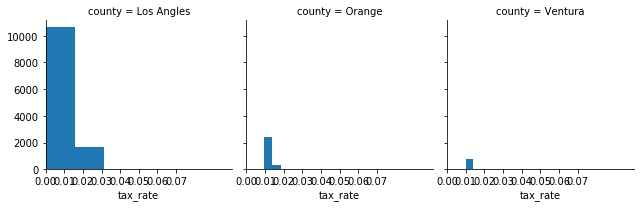

In [8]:
#Tax distribution by county.

from matplotlib import pyplot as plt

g = sns.FacetGrid(df_tax, col = "county")
g.map(plt.hist, "tax_rate")
plt.xlim(0,.1)
plt.xticks(np.arange(0, .07, step=0.01))

plt.show()

In [9]:
df_tax.groupby(['county','tax_rate'],as_index=False).count()

,county,tax_rate,tax_value,fips,taxamount
0,Los Angles,0.0003,1,1,1
1,Los Angles,0.0004,1,1,1
2,Los Angles,0.0018,1,1,1
3,Los Angles,0.0020,1,1,1
4,Los Angles,0.0023,1,1,1
5,Los Angles,0.0032,1,1,1
6,Los Angles,0.0036,1,1,1
7,Los Angles,0.0042,1,1,1
8,Los Angles,0.0050,1,1,1
9,Los Angles,0.0056,1,1,1


In [10]:
df.describe()

,id,bathrooms,bedrooms,sqft,tax_value
count,15982.000000,15982.000000,15982.000000,15982.000000,1.598200e+04
mean,42320.988737,2.214992,3.252597,1836.581905,4.633691e+05
std,6529.896396,1.027066,0.950211,985.314844,6.435119e+05
min,1772.000000,1.000000,1.000000,320.000000,7.584000e+03
25%,36972.250000,2.000000,3.000000,1233.000000,1.817542e+05
50%,41635.000000,2.000000,3.000000,1592.000000,3.202605e+05
75%,47990.750000,3.000000,4.000000,2161.750000,5.287630e+05
max,53503.000000,20.000000,25.000000,26345.000000,1.912982e+07


In [11]:
df.dtypes

transactiondate     object
id                   int64
bathrooms          float64
bedrooms           float64
sqft               float64
tax_value          float64
dtype: object

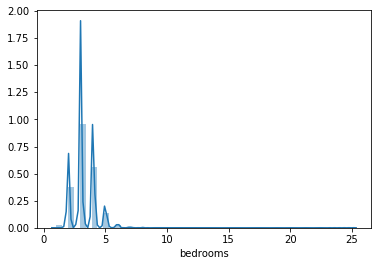

In [12]:
sns.distplot(df['bedrooms'])

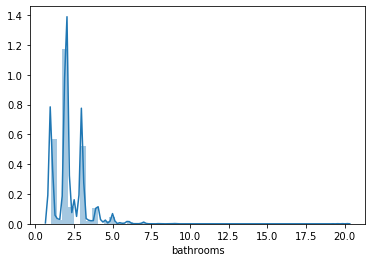

In [13]:
sns.distplot(df['bathrooms'])

(0, 10000)

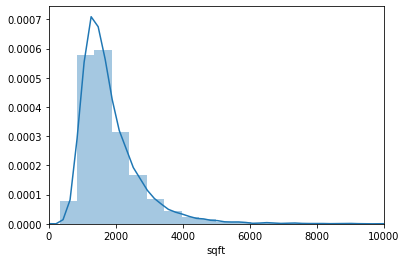

In [14]:
sns.distplot(df['sqft'])
plt.xlim(0,10000)

(0, 1000000)

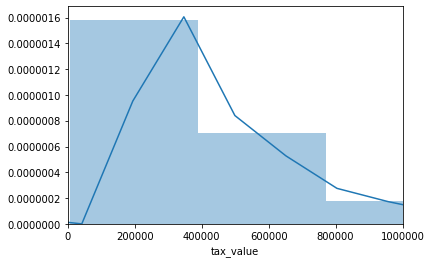

In [15]:
sns.distplot(df['tax_value'])
plt.xlim(0,1_000_000)

#### Prep and clean data

In [16]:
#dropping id and transactiondate from table before scaling
df.drop('id',axis=1,inplace=True)
df.drop('transactiondate',axis=1,inplace=True)

In [17]:
df.head(1)

,bathrooms,bedrooms,sqft,tax_value
0,2.0,4.0,1604.0,498347.0


#### Split and Scale

In [18]:
train, test = split_scale.split_my_data(df,train_ratio=.8,seed=123)

In [19]:
#scaler, train, test = split_scale.standard_scaler(train,test)

In [20]:
X_train = train.drop(columns='tax_value')
y_train = train[['tax_value']]
X_test = test.drop(columns='tax_value')
y_test = test[['tax_value']]

In [150]:
train.head()

,bathrooms,bedrooms,sqft,tax_value,yhat,tax_mean,residual,residual2
7491,2.0,3.0,1381.0,314307.0,279325.544463,463464.489402,-34981.455537,1.223702e+09
13860,1.0,3.0,961.0,202311.0,26915.490208,463464.489402,-175395.509792,3.076358e+10
15248,2.0,3.0,1685.0,477141.0,417908.092763,463464.489402,-59232.907237,3.508537e+09
7782,2.0,4.0,1415.0,58970.0,148650.138024,463464.489402,89680.138024,8.042527e+09
12504,3.0,3.0,2538.0,523441.0,867707.105618,463464.489402,344266.105618,1.185192e+11


#### Data exploration

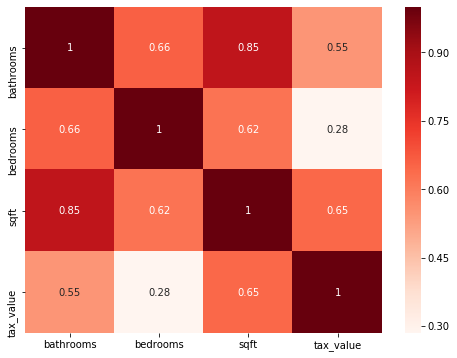

In [22]:
plt.figure(figsize=(8,6))
cor = train.corr()
sns.heatmap(cor,annot=True,cmap=plt.cm.Reds)
plt.show()

In [23]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
#OLS object to analyze features

# ols_model = sm.OLS(y_train,X_train)
# fit = ols_model.fit()
# fit.summary()

ols_model = ols('y_train ~ X_train',data=train).fit()
train['yhat'] = ols_model.predict(y_train)

In [ ]:
def ols_model():
    ols crap
    
ols_model()

In [24]:
#r2 of 
r2_lm1 = r2_score(y_train,train.yhat)
r2_lm1

0.4447042156038722

In [25]:
#creating baseline with mean of tax value
train['tax_mean'] = train.tax_value.mean()
train.head()

,bathrooms,bedrooms,sqft,tax_value,yhat,tax_mean
7491,2.0,3.0,1381.0,314307.0,279325.544463,463464.489402
13860,1.0,3.0,961.0,202311.0,26915.490208,463464.489402
15248,2.0,3.0,1685.0,477141.0,417908.092763,463464.489402
7782,2.0,4.0,1415.0,58970.0,148650.138024,463464.489402
12504,3.0,3.0,2538.0,523441.0,867707.105618,463464.489402


In [26]:
#creating residual of tax value vs expected tax value
train['residual'] = train['yhat'] - train['tax_value']
train['residual2'] = train.residual **2

In [27]:
train.head(1)

,bathrooms,bedrooms,sqft,tax_value,yhat,tax_mean,residual,residual2
7491,2.0,3.0,1381.0,314307.0,279325.544463,463464.489402,-34981.455537,1.223702e+09


#### Modeling & Evaluation MVP

In [28]:
from sklearn.linear_model import LinearRegression
#pick model type, Linear Regression for the MVP baseline
lm1 = LinearRegression()


In [29]:
#fit and train model
lm1.fit(X_train,y_train)
lm1_y_intercept = lm1.intercept_
lm1_coefficients = lm1.coef_

print('{} = b + m1 * {} + m2 * {}'.format(y_train.columns[0], X_train.columns[0],X_train.columns[1]))
print('    y-intercept  (b): %.2f' % lm1_y_intercept)
print('    coefficient (m1): %.2f' % lm1_coefficients[0][0])
print('    coefficient (m2): %.2f' % lm1_coefficients[0][1])

tax_value = b + m1 * bathrooms + m2 * bedrooms
    y-intercept  (b): -33592.49
    coefficient (m1): 60947.32
    coefficient (m2): -146174.77


In [30]:
#converting y_train to panda series
y_train = y_train.tax_value

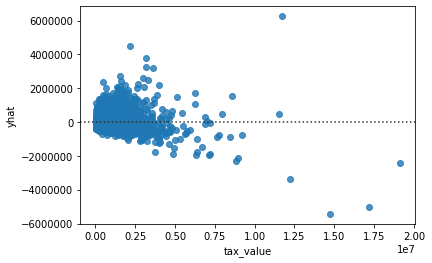

In [31]:
#Plotting residuals
sns.residplot(y_train,train.yhat)

In [32]:
#MSE, SSE, RMSE
import math
sse = sum(train.residual2)
mse = sse/len(train)
rmse = math.sqrt(mse)
r2 = ols_model.rsquared
print(sse,mse,rmse,r2)

2991275764154680.0 233967599855.66522 483701.97421104787 0.4447042156038722


Text(0.5, 1, 'Predicted vs Actual Tax Value')

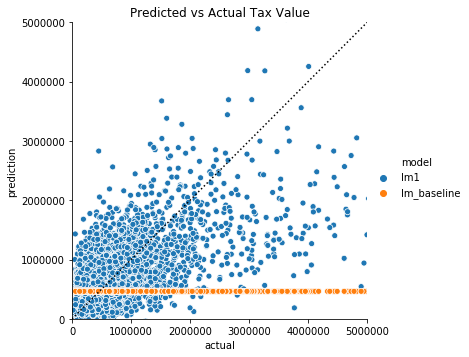

In [33]:
pd.DataFrame({'actual': y_train,
              'lm1': train.yhat,
              'lm_baseline': train.tax_mean})\
.melt(id_vars=['actual'], var_name='model', value_name='prediction')\
.pipe((sns.relplot, 'data'), x='actual', y='prediction', hue='model')


min, max = 0, 5_000_000
plt.plot([min, max], [min, max], c='black', ls=':')
plt.ylim(min, max)
plt.xlim(min, max)
plt.title('Predicted vs Actual Tax Value')

In [34]:
mse_lm1 = mean_squared_error(y_train,train.tax_mean)
print("linear model\n  mean squared error: {:.3}".format(mse_lm1)) 


#print('  {:.2%} of the variance in the house price can be explained by the num of bathrooms, num of bedrooms, and sq ft of house.'.format(r2_lm1))

linear model
  mean squared error: 4.21e+11


In [234]:
#start of 2nd model.

df2 = wrangle.wrangle_zillow2()

In [235]:
df2.head()

,zipcode,fips,transactiondate,id,bathrooms,bedrooms,sqft,tax_value
0,96415.0,6037.0,2017-06-30,1772,2.0,4.0,1604.0,498347.0
1,96452.0,6037.0,2017-06-01,2028,3.0,3.0,2384.0,549917.0
2,97319.0,6037.0,2017-06-01,3273,2.0,3.0,1574.0,235272.0
3,97329.0,6037.0,2017-06-29,3429,2.0,2.0,1619.0,340000.0
4,96086.0,6037.0,2017-06-27,4505,3.0,2.0,2408.0,2017254.0


In [212]:
#df2.groupby('zipcode').count().sort_values(by='tax_value',ascending=False)

In [233]:
#testing just one county instead of entire dataset. 2nd test limiting by most frequent zip code 96

#df2 = df2[df2.fips==6111]
#df2 = df2[df2.zipcode==96193]
len(df2)
df2.head()

,sqft,tax_value,quantile
2,1574.0,235272.0,1
6,1136.0,305481.0,1
8,914.0,260000.0,1
11,1017.0,275061.0,1
12,850.0,285180.0,1


In [213]:
df2['quantile'] = pd.qcut(df2['tax_value'],4,labels=False)
df2.head()
#testing by tax_value quantile



,zipcode,fips,transactiondate,id,bathrooms,bedrooms,sqft,tax_value,quantile
0,96415.0,6037.0,2017-06-30,1772,2.0,4.0,1604.0,498347.0,2
1,96452.0,6037.0,2017-06-01,2028,3.0,3.0,2384.0,549917.0,3
2,97319.0,6037.0,2017-06-01,3273,2.0,3.0,1574.0,235272.0,1
3,97329.0,6037.0,2017-06-29,3429,2.0,2.0,1619.0,340000.0,2
4,96086.0,6037.0,2017-06-27,4505,3.0,2.0,2408.0,2017254.0,3


In [264]:
zip_codes = df2[['zipcode','tax_value']]
zip_codes = pd.DataFrame(round(zip_codes.groupby('zipcode')['tax_value'].mean()))

In [265]:
zip_codes.head()
#df2.groupby('zipcode').count().sort_values(by='tax_value',ascending=False)

,tax_value
zipcode,
95982.0,141217.0
95983.0,163153.0
95984.0,158700.0
95985.0,984668.0
95986.0,1227170.0


In [215]:
#dropping all columns except for square feet.
df2.drop('id',axis=1,inplace=True)
df2.drop('transactiondate',axis=1,inplace=True)
df2.drop('fips',axis=1,inplace=True)
df2.drop('bedrooms',axis=1,inplace=True)
df2.drop('zipcode',axis=1,inplace=True)
df2.drop('bathrooms',axis=1,inplace=True)

In [216]:
train2, test2 = split_scale.split_my_data(df2,train_ratio=.8,seed=123)

In [217]:
X_train2 = train2.drop(columns='tax_value')
y_train2 = train2[['tax_value']]
X_test2 = test2.drop(columns='tax_value')
y_test2 = test2[['tax_value']]

In [218]:
y_train2.head()

,tax_value
1434,261782.0
4353,304484.0
12241,275064.0
12279,222887.0
1065,296057.0


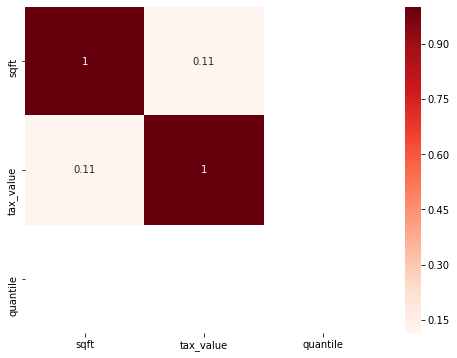

In [219]:
plt.figure(figsize=(8,6))
cor2 = train2.corr()
sns.heatmap(cor2,annot=True,cmap=plt.cm.Reds)
plt.show()

In [220]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
#OLS object to analyze features

# ols_model = sm.OLS(y_train,X_train)
# fit = ols_model.fit()
# fit.summary()

ols_model2 = ols('y_train2 ~ X_train2',data=train2).fit()
train2['yhat'] = ols_model2.predict(y_train2)

In [221]:
r2_lm2 = r2_score(y_train2,train2.yhat)
r2_lm2

0.013171430430044428

In [144]:
#creating residual of tax value vs expected tax value
train2['residual'] = train2['yhat'] - train2['tax_value']
train2['residual2'] = train2.residual **2

In [145]:
from sklearn.linear_model import LinearRegression
#pick model type, Linear Regression for the MVP baseline
lm2 = LinearRegression()

In [146]:
#fit and train model
lm2.fit(X_train2,y_train2)
lm2_y_intercept = lm2.intercept_
lm2_coefficients = lm2.coef_

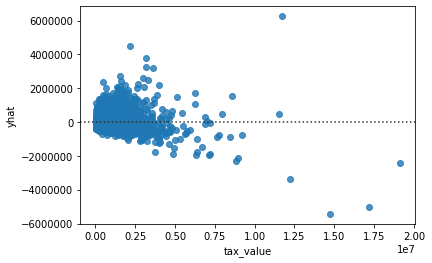

In [147]:
#Plotting residuals
sns.residplot(y_train,train.yhat)

In [148]:
#converting y_train to panda series
y_train2 = y_train2.tax_value

In [149]:
#MSE, SSE, RMSE for lm2
import math
sse2 = sum(train2.residual2)
mse2 = sse2/len(train2)
rmse2 = math.sqrt(mse2)
r2_lm2 = ols_model2.rsquared
print(sse2,mse2,rmse2,r2_lm2)

32775304880458.098 52024293461.0446 228088.34573700736 0.5486414981152794


Text(0.5, 1, 'Predicted vs Actual Tax Value')

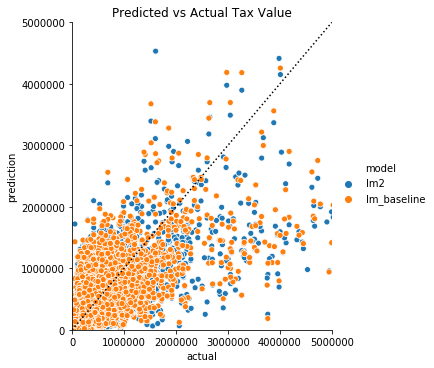

In [132]:
pd.DataFrame({'actual': y_train2,
              'lm2': train2.yhat,
              'lm_baseline': train.yhat})\
.melt(id_vars=['actual'], var_name='model', value_name='prediction')\
.pipe((sns.relplot, 'data'), x='actual', y='prediction', hue='model')


min, max = 0, 5_000_000
plt.plot([min, max], [min, max], c='black', ls=':')
plt.ylim(min, max)
plt.xlim(min, max)
plt.title('Predicted vs Actual Tax Value')

In [ ]:
#Using just sqft and splitting by county performs slightly better than bedrooms, bathrooms and sq ft for Orange County and Ventura County, worse for LA county